In [220]:
import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
from scipy.stats import ttest_1samp
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [3]:
pwd

'C:\\Users\\Roni Kaakaty\\Downloads\\ThinkStats2-master\\code'

In [11]:
#read excel file

df= pd.read_excel('Databall.xlsx', index_col=0)

In [12]:
#verify data loaded

df.head

<bound method NDFrame.head of             Player Name  Age Position  Annual Salary  Average    OBP    SLG  \
Year                                                                          
2015      Jason Heyward   26       RF             23    0.273  0.353  0.417   
2015        Chris Davis   29       1B             23    0.248  0.344  0.533   
2015       Justin Upton   27       LF             22    0.271  0.350  0.462   
2015    Yeonis Cespedes   29       LF             25    0.264  0.317  0.466   
2015        Ben Zobrist   34       RF             14    0.272  0.362  0.423   
2016      Dexter Fowler   30       RF             17    0.267  0.371  0.419   
2016        Ian Desmond   30       CF             14    0.258  0.313  0.496   
2016     Carlos Beltran   39       RF             16    0.268  0.325  0.462   
2016  Edwin Encarnacion   33       DH             20    0.269  0.361  0.544   
2016       Josh Reddick   29       RF             13    0.272  0.331  0.433   
2017        Eric Hosme

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A76AEB50>]],
      dtype=object)

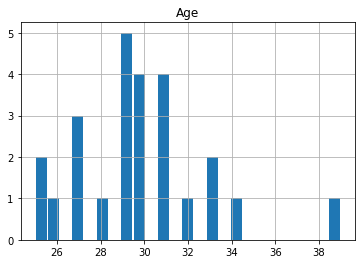

In [33]:
#Variable Histograms

df.hist(column='Age', bins=25, rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A7249D30>]],
      dtype=object)

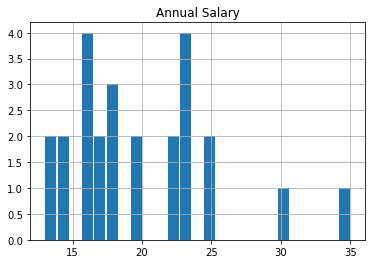

In [30]:
df.hist(column='Annual Salary',bins= 25,rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A78F8040>]],
      dtype=object)

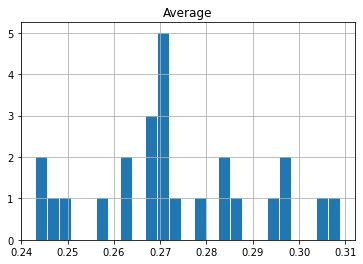

In [39]:
df.hist(column='Average',bins=25,rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A8D553D0>]],
      dtype=object)

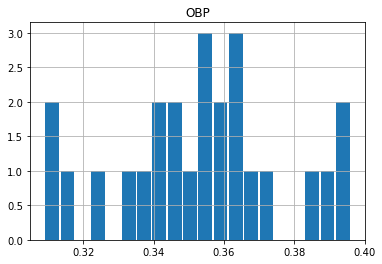

In [49]:
df.hist(column='OBP',bins=20,rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A8F8F5B0>]],
      dtype=object)

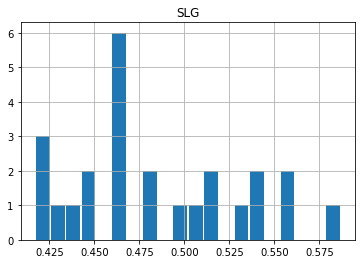

In [52]:
df.hist(column='SLG',bins=20,rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A94B60A0>]],
      dtype=object)

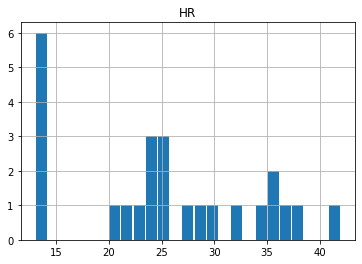

In [62]:
df.hist(column='HR',bins=25,rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A92F4730>]],
      dtype=object)

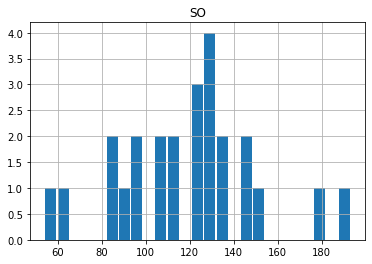

In [59]:
df.hist(column='SO',bins=25,rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2A969ECA0>]],
      dtype=object)

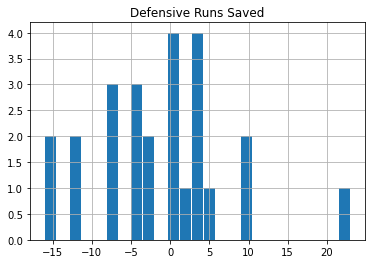

In [65]:
df.hist(column='Defensive Runs Saved',bins=25,rwidth=.90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2AA8EB8E0>]],
      dtype=object)

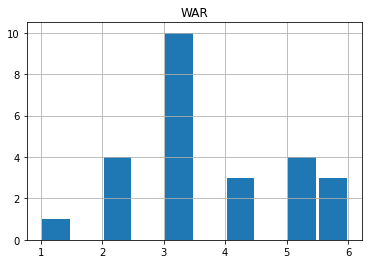

In [70]:
df.hist(column='WAR',rwidth=.90)

In [85]:
#Identify largest value to check outliers

df.nlargest(5,['Age'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2016,Carlos Beltran,39,RF,16,0.268,0.325,0.462,21,89,-7,1
2015,Ben Zobrist,34,RF,14,0.272,0.362,0.423,14,93,-5,5
2016,Edwin Encarnacion,33,DH,20,0.269,0.361,0.544,38,106,0,4
2019,Josh Donaldson,33,3B,23,0.271,0.389,0.543,36,128,4,6
2018,Josh Donaldson,32,3B,23,0.284,0.387,0.559,37,121,-2,6


In [86]:
#Identify smallest values to check outliers

df.nsmallest(5,['Age'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2018,Bryce Harper,25,RF,25,0.270,0.393,0.511,29,128,-7,3
2018,Manny Machado,25,3B,30,0.283,0.340,0.514,36,113,2,5
2015,Jason Heyward,26,RF,23,0.273,0.353,0.417,13,87,23,5
2015,Justin Upton,27,LF,22,0.271,0.350,0.462,24,151,-5,3
2017,Eric Hosmer,27,1B,18,0.294,0.359,0.463,23,115,0,3


In [87]:
df.nlargest(5,['SO'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2015,Chris Davis,29,1B,23,0.248,0.344,0.533,42,193,-5,4
2016,Ian Desmond,30,CF,14,0.258,0.313,0.496,22,177,-2,3
2015,Justin Upton,27,LF,22,0.271,0.350,0.462,24,151,-5,3
2017,J.D. Martinez,29,LF,22,0.297,0.364,0.587,35,145,-7,4
2019,Nick Castellanos,27,RF,16,0.286,0.337,0.505,25,145,-16,2


In [88]:
df.nsmallest(5,['SO'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2018,Michael Brantley,31,LF,16,0.306,0.367,0.464,14,54,3,3
2016,Josh Reddick,29,RF,13,0.272,0.331,0.433,14,61,5,3
2019,Anthony Rendon,29,3B,35,0.309,0.396,0.555,28,83,3,6
2015,Jason Heyward,26,RF,23,0.273,0.353,0.417,13,87,23,5
2016,Carlos Beltran,39,RF,16,0.268,0.325,0.462,21,89,-7,1


In [89]:
df.nlargest(5,['WAR'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2018,Josh Donaldson,32,3B,23,0.284,0.387,0.559,37,121,-2,6
2019,Anthony Rendon,29,3B,35,0.309,0.396,0.555,28,83,3,6
2019,Josh Donaldson,33,3B,23,0.271,0.389,0.543,36,128,4,6
2015,Jason Heyward,26,RF,23,0.273,0.353,0.417,13,87,23,5
2015,Ben Zobrist,34,RF,14,0.272,0.362,0.423,14,93,-5,5


In [90]:
df.nsmallest(5,['WAR'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2016,Carlos Beltran,39,RF,16,0.268,0.325,0.462,21,89,-7,1
2017,Carlos Santana,31,1B,20,0.250,0.362,0.449,25,105,0,2
2017,Jay Bruce,30,LF,13,0.243,0.309,0.483,32,137,0,2
2018,Andrew McCutchen,31,CF,17,0.263,0.356,0.447,24,135,-12,2
2019,Nick Castellanos,27,RF,16,0.286,0.337,0.505,25,145,-16,2


In [91]:
df.nlargest(5,['Defensive Runs Saved'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2015,Jason Heyward,26,RF,23,0.273,0.353,0.417,13,87,23,5
2017,Lorenzo Cain,31,CF,16,0.298,0.354,0.442,13,94,10,5
2019,Yasmani Grandal,30,C,18,0.245,0.346,0.464,25,131,9,3
2016,Josh Reddick,29,RF,13,0.272,0.331,0.433,14,61,5,3
2019,Josh Donaldson,33,3B,23,0.271,0.389,0.543,36,128,4,6


In [92]:
df.nsmallest(5,['Defensive Runs Saved'])

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2015,Yeonis Cespedes,29,LF,25,0.264,0.317,0.466,24,122,-16,3
2019,Nick Castellanos,27,RF,16,0.286,0.337,0.505,25,145,-16,2
2016,Dexter Fowler,30,RF,17,0.267,0.371,0.419,13,129,-12,3
2018,Andrew McCutchen,31,CF,17,0.263,0.356,0.447,24,135,-12,2
2016,Carlos Beltran,39,RF,16,0.268,0.325,0.462,21,89,-7,1


In [94]:
#replace two outliers in the dataset with NAN

new_df= df.replace([39, 193], np.NAN)
new_df

,Player Name,Age,Position,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
Year,,,,,,,,,,,
2015,Jason Heyward,26.0,RF,23,0.273,0.353,0.417,13,87.0,23,5
2015,Chris Davis,29.0,1B,23,0.248,0.344,0.533,42,NaN,-5,4
2015,Justin Upton,27.0,LF,22,0.271,0.350,0.462,24,151.0,-5,3
2015,Yeonis Cespedes,29.0,LF,25,0.264,0.317,0.466,24,122.0,-16,3
2015,Ben Zobrist,34.0,RF,14,0.272,0.362,0.423,14,93.0,-5,5
2016,Dexter Fowler,30.0,RF,17,0.267,0.371,0.419,13,129.0,-12,3
2016,Ian Desmond,30.0,CF,14,0.258,0.313,0.496,22,177.0,-2,3
2016,Carlos Beltran,NaN,RF,16,0.268,0.325,0.462,21,89.0,-7,1
2016,Edwin Encarnacion,33.0,DH,20,0.269,0.361,0.544,38,106.0,0,4


In [101]:
#Find mean of of variables

new_df.Age.mean()

29.416666666666668

In [102]:
df.Age.mean()

29.8

In [103]:
new_df.WAR.mean()

3.56

In [104]:
new_df.SO.mean()

115.5

In [105]:
df.SO.mean()

118.6

In [112]:
new_df.HR.mean()

25.48

In [113]:
new_df.Average.mean()

0.2735600000000001

In [114]:
new_df.OBP.mean()

0.35316000000000003

In [115]:
new_df.SLG.mean()

0.48499999999999993

In [117]:
#Find variation of variables

new_df.Age.var()

5.905797101449275

In [118]:
#Find standard deviation of variables

new_df.Age.std()

2.430184581765195

In [121]:
new_df.WAR.var()

1.9233333333333336

In [122]:
new_df.WAR.std()

1.3868429375143148

In [123]:
new_df.HR.var()

77.67666666666665

In [124]:
new_df.SO.std()

28.732650719891897

In [125]:
new_df.Age.std()

2.430184581765195

In [126]:
new_df.HR.std()

8.813436711446146

In [127]:
#Identify median

new_df.median()

Age                      29.500
Annual Salary            18.000
Average                   0.271
OBP                       0.354
SLG                       0.466
HR                       25.000
SO                      121.500
Defensive Runs Saved      0.000
WAR                       3.000
dtype: float64

In [128]:
#Identify the mean 

new_df.mean()

Age                      29.416667
Annual Salary            19.880000
Average                   0.273560
OBP                       0.353160
SLG                       0.485000
HR                       25.480000
SO                      115.500000
Defensive Runs Saved     -1.320000
WAR                       3.560000
dtype: float64

In [130]:
#Identify mode

new_df.Age.mode()

0    29.0
dtype: float64

In [132]:
#Identify standard deviations

new_df.std()

Age                      2.430185
Annual Salary            5.333229
Average                  0.017998
OBP                      0.023785
SLG                      0.047816
HR                       8.813437
SO                      28.732651
Defensive Runs Saved     8.600969
WAR                      1.386843
dtype: float64

In [133]:
#Provides values of dataset

new_df.describe()

,Age,Annual Salary,Average,OBP,SLG,HR,SO,Defensive Runs Saved,WAR
count,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,24.000000,25.000000,25.000000
mean,29.416667,19.880000,0.273560,0.353160,0.485000,25.480000,115.500000,-1.320000,3.560000
std,2.430185,5.333229,0.017998,0.023785,0.047816,8.813437,28.732651,8.600969,1.386843
min,25.000000,13.000000,0.243000,0.309000,0.417000,13.000000,54.000000,-16.000000,1.000000
25%,27.750000,16.000000,0.264000,0.340000,0.449000,21.000000,93.750000,-7.000000,3.000000
50%,29.500000,18.000000,0.271000,0.354000,0.466000,25.000000,121.500000,0.000000,3.000000
75%,31.000000,23.000000,0.284000,0.364000,0.514000,32.000000,132.000000,3.000000,5.000000
max,34.000000,35.000000,0.309000,0.396000,0.587000,42.000000,177.000000,23.000000,6.000000


In [134]:
#Renames columns to remove spaces

new_df.columns = new_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [135]:
new_df.head()

,player_name,age,position,annual_salary,average,obp,slg,hr,so,defensive_runs_saved,war
Year,,,,,,,,,,,
2015,Jason Heyward,26.0,RF,23,0.273,0.353,0.417,13,87.0,23,5
2015,Chris Davis,29.0,1B,23,0.248,0.344,0.533,42,NaN,-5,4
2015,Justin Upton,27.0,LF,22,0.271,0.350,0.462,24,151.0,-5,3
2015,Yeonis Cespedes,29.0,LF,25,0.264,0.317,0.466,24,122.0,-16,3
2015,Ben Zobrist,34.0,RF,14,0.272,0.362,0.423,14,93.0,-5,5


In [137]:
#Create PMF

salary = new_df['annual_salary']

In [147]:
pmf_salary = thinkstats2.Pmf(salary, label= 'Annual Salary')

In [162]:
pmf_salary_2015 = thinkstats2.Pmf([23, 23, 22, 25, 14])
pmf_salary_2019 = thinkstats2.Pmf([35, 23, 18, 16, 18])

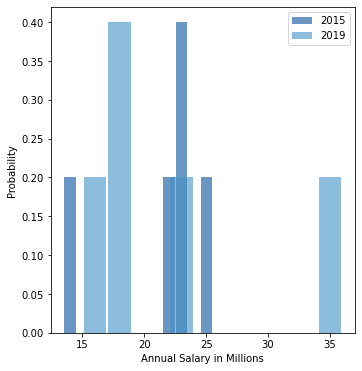

In [174]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_salary_2015, label ='2015')
thinkplot.Hist(pmf_salary_2019, label ='2019')
thinkplot.Config(xlabel= 'Annual Salary in Millions',
                ylabel= 'Probability')

In [177]:
#Create CDF

war = new_df['war']

In [178]:
cdf= thinkstats2.Cdf(war, label= 'WAR')

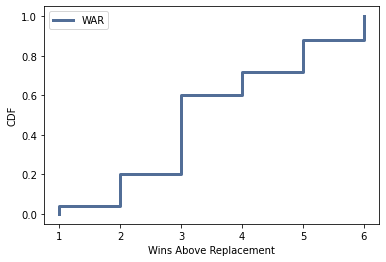

<Figure size 576x432 with 0 Axes>

In [181]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Wins Above Replacement', ylabel= "CDF")

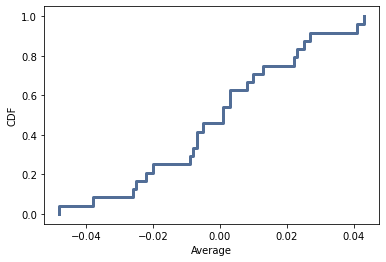

<Figure size 576x432 with 0 Axes>

In [184]:
#Create exponential distribution

diffs=new_df.average.diff()
cdf_diff= thinkstats2.Cdf(diffs)
thinkplot.Cdf(cdf_diff)
thinkplot.Show(xlabel='Average', ylabel='CDF')

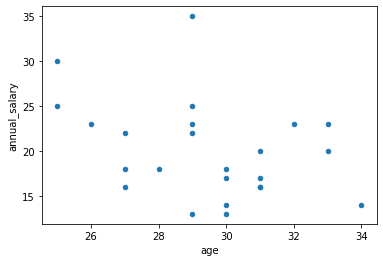

In [186]:
#Create scatterplots

new_df.plot.scatter(x='age', y='annual_salary')

In [191]:
#Find correlation

thinkstats2.Corr(new_df.age,np.log(new_df.annual_salary))

nan

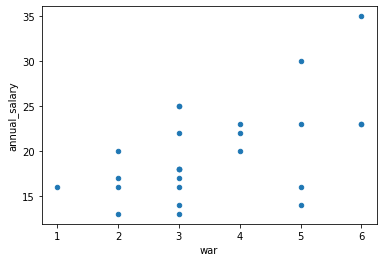

In [192]:
new_df.plot.scatter(x='war', y='annual_salary')

In [193]:
#Find correlation

thinkstats2.Corr(new_df.war,np.log(new_df.annual_salary))

0.5295149402759264

In [197]:
#Hypothesis Testing

batting_avg=new_df['average']

In [198]:
print(batting_avg)

Year
2015    0.273
2015    0.248
2015    0.271
2015    0.264
2015    0.272
2016    0.267
2016    0.258
2016    0.268
2016    0.269
2016    0.272
2017    0.294
2017    0.297
2017    0.298
2017    0.250
2017    0.243
2018    0.270
2018    0.283
2018    0.263
2018    0.306
2018    0.284
2019    0.309
2019    0.271
2019    0.245
2019    0.286
2019    0.278
Name: average, dtype: float64


In [201]:
batting_avg_mean = np.mean(batting_avg)
print(batting_avg_mean)
tset, pval = ttest_1samp(batting_avg, .300)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

0.2735600000000001
 We are rejecting null hypothesis


In [233]:
#Regression analysis

x= np.array([5,4,3,3,5,3,3,1,4,3,3,4,5,2,2,3,5,2,3,6,6,6,3,2,3
])
y= np.array([23,23,22,25,14,17,14,16,20,13,18,22,16,20,13,25,30,17,16,23,35,23,18,16,18
])

In [234]:
linreg= LinearRegression()

In [235]:
x = x.reshape(-1, 1)

In [236]:
linreg.fit(x, y)

LinearRegression()

In [218]:
y_pred = linreg.predict(x)

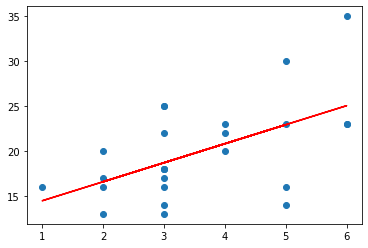

In [229]:
#War vs Annual salary linear regression

plt.scatter(x,y)
plt.plot(x, y_pred,color = 'red')
plt.show()

In [237]:
x= np.array([13,42,24,24,14,13,22,21,38,14,23,35,13,25,32,29,36,24,14,37,28,36,25,25,30

])
y= np.array([23,23,22,25,14,17,14,16,20,13,18,22,16,20,13,25,30,17,16,23,35,23,18,16,18
])

In [238]:
linreg= LinearRegression()

In [239]:
x = x.reshape(-1, 1)

In [240]:
linreg.fit(x, y)

LinearRegression()

In [241]:
y_pred = linreg.predict(x)

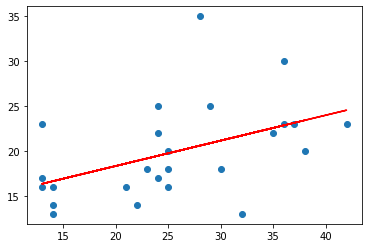

In [242]:
#HR vs Annual Salary linear regression
plt.scatter(x,y)
plt.plot(x, y_pred,color = 'red')
plt.show()